In [303]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import nltk
from string import punctuation
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder

In [304]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [305]:
faq =pd.read_csv('/content/Mental_Health_FAQ.csv')
faq

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."
...,...,...,...
93,4373204,How do I know if I'm drinking too much?,Sorting out if you are drinking too much can b...
94,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c..."
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...


In [306]:
print("\nInformation about the dataset:")
print(faq.info())


print("\nStatistiques:")
print(faq.describe())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Question_ID  98 non-null     int64 
 1   Questions    98 non-null     object
 2   Answers      98 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB
None

Statistiques:
        Question_ID
count  9.800000e+01
mean   5.127967e+06
std    2.696725e+06
min    1.030153e+06
25%    2.889464e+06
50%    4.788133e+06
75%    7.626698e+06
max    9.679704e+06


In [307]:
faq_quest = faq[['Question_ID', 'Questions']]
faq_answ = faq[['Question_ID', 'Answers']]

In [308]:
def to_lower(text):
    return text.lower()

In [309]:
contractions_dict = {
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
"don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
"he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I had", "I'd've": "I would have",
"I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
"o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
"sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had", "she'd've": "she would have", "she'll": "she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that had", "that'd've": "that would have",
"that's": "that is", "there'd": "there had", "there'd've": "there would have", "there's": "there is", "they'd": "they had",
"they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are",
"they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had", "we'd've": "we would have",
"we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
"what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have",
"when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
"who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
"why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
"wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
"y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had",
"you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

def expand_contraction(text, contraction_dict):
    contraction_pattern= re.compile('({})'.format('|'.join(contraction_dict.keys())), flags= re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match= contraction.group(0)
        first_char= match[0]
        expanded_contraction= contraction_dict.get(match) \
            if contraction_dict.get(match) \
            else contraction_dict.get(match.lower())
        expanded_contraction= expanded_contraction
        return expanded_contraction

    expanded_text= contraction_pattern.sub(expand_match, text)
    expanded_text= re.sub("'","", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contraction(text, contractions_dict)
    return text

In [310]:
def remove_unwanted_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [311]:
# def remove_number(text):
#     output = ''.join(c for c in text if not c.isdigit())
#     return output

In [312]:
# def remove_punct(text):
#     return "".join(c for c in text if c not in punctuation)

In [313]:
# def remove_char(text):
#     text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
#     return text

In [314]:
def to_strip(text):
    return " ".join([c for c in text.split() if len(c)>2])

In [315]:
def remove_duplicate(text):
    text = re.sub("(.)\\1{2,}", "\\1", text)
    return text

In [316]:
from nltk.corpus import stopwords
stopwords.words('english')

def remove_stopwords(text):
    stop_words= stopwords.words('english')

    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [317]:
from nltk.stem import WordNetLemmatizer

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lemmatize_words = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [318]:
def full_preprocess(text):
    text = to_lower(text)
    text = main_contraction(text)
    text = remove_unwanted_chars(text)
    text = to_strip(text)
    text = remove_duplicate(text)
    text = remove_stopwords(text)
    text = lemma(text)
    return text

faq_quest['Cleaned_Questions'] = faq_quest['Questions'].apply(full_preprocess)
faq_quest[['Questions', 'Cleaned_Questions']].head(10)


,Questions,Cleaned_Questions
0,What does it mean to have a mental illness?,mean mental illness
1,Who does mental illness affect?,mental illness affect
2,What causes mental illness?,cause mental illness
3,What are some of the warning signs of mental i...,warning sign mental illness
4,Can people with mental illness recover?,people mental illness recover
5,What should I do if I know someone who appears...,know someone appears symptom mental disorder
6,How can I find a mental health professional fo...,find mental health professional child
7,What treatment options are available?,treatment option available
8,"If I become involved in treatment, what do I n...",become involved treatment need know
9,What is the difference between mental health p...,difference mental health professional


In [319]:
faq_answ['Cleaned_Answers'] = faq_answ['Answers'].apply(full_preprocess)
faq_answ[['Answers', 'Cleaned_Answers']].head(10)


,Answers,Cleaned_Answers
0,Mental illnesses are health conditions that di...,mental illness health condition disrupt person...
1,It is estimated that mental illness affects 1 ...,estimated mental illness affect adult america ...
2,It is estimated that mental illness affects 1 ...,estimated mental illness affect adult america ...
3,Symptoms of mental health disorders vary depen...,symptom mental health disorder vary depending ...
4,"When healing from mental illness, early identi...",healing mental illness early identification tr...
5,Although this website cannot substitute for pr...,although website substitute professional advic...
6,Feeling comfortable with the professional you ...,feeling comfortable professional child working...
7,Just as there are different types of medicatio...,different type medication physical illness dif...
8,Since beginning treatment is a big step for in...,since beginning treatment big step individual ...
9,There are many types of mental health professi...,many type mental health professional variety p...


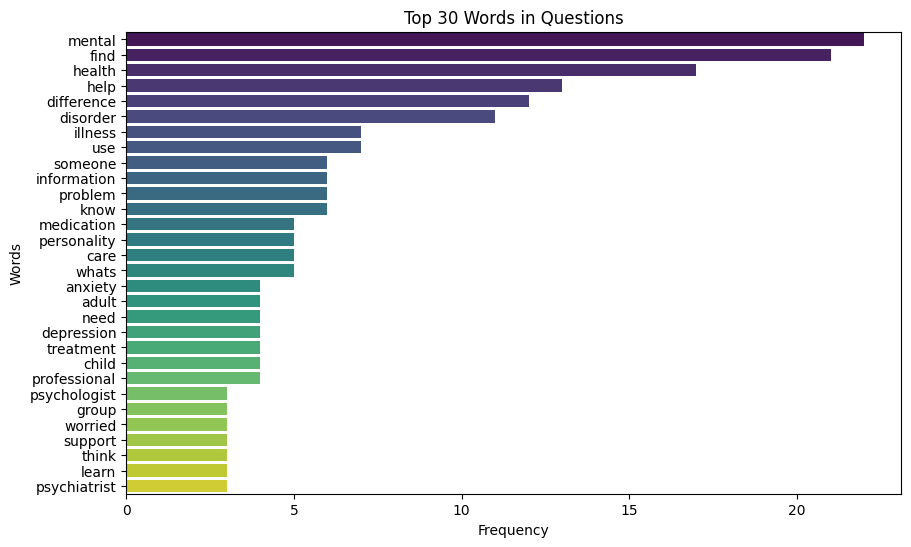

In [320]:
def dictionary(check):
    check = check.str.extractall('([a-zA-Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    dictionary_df = pd.DataFrame({'word': check.index, 'freq': check.values})
    return dictionary_df

dictionary_questions = dictionary(faq_quest['Cleaned_Questions'])

plt.figure(figsize=(10, 6))
sns.barplot(x='freq', y='word', data=dictionary_questions[:30], palette='viridis')
plt.title('Top 30 Words in Questions')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


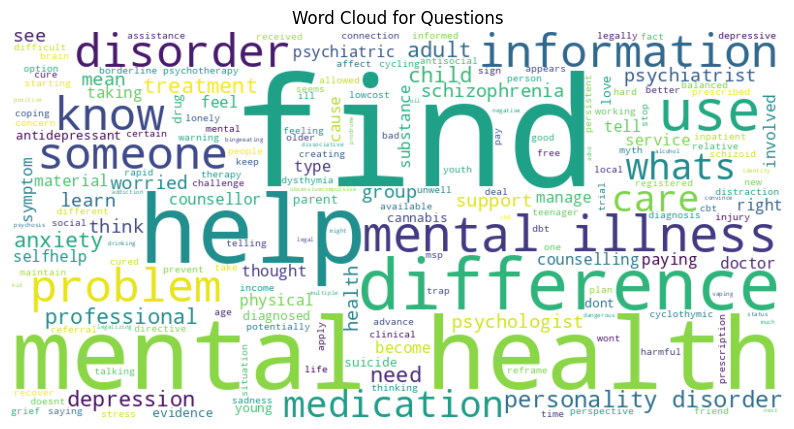

In [321]:
questions_text = ' '.join(faq_quest['Cleaned_Questions'])
wordcloud_questions = WordCloud(width=800, height=400, background_color='white').generate(questions_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_questions, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Questions')
plt.show()


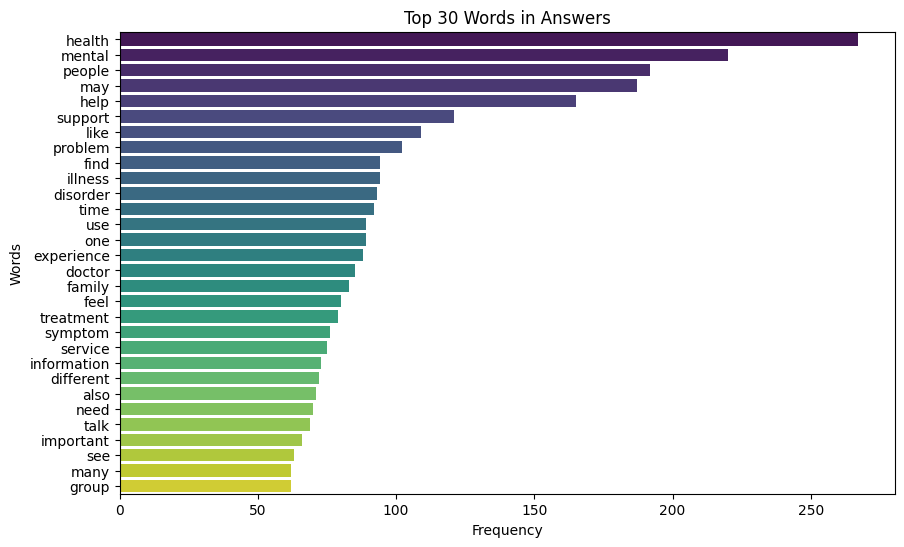

In [322]:
dictionary_answers = dictionary(faq_answ['Cleaned_Answers'])

plt.figure(figsize=(10, 6))
sns.barplot(x='freq', y='word', data=dictionary_answers[:30], palette='viridis')
plt.title('Top 30 Words in Answers')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


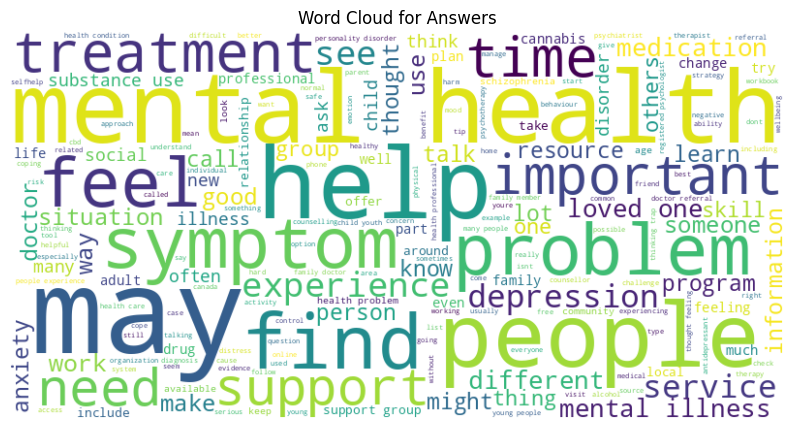

In [323]:
answers_text = ' '.join(faq_answ['Cleaned_Answers'])
wordcloud_answers = WordCloud(width=800, height=400, background_color='white').generate(answers_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_answers, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Answers')
plt.show()


In [324]:
label = LabelEncoder()
faq['AnswersEncode'] = label.fit_transform(faq['Answers'])
faq

,Question_ID,Questions,Answers,AnswersEncode
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,48
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,35
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...,36
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,72
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi...",91
...,...,...,...,...
93,4373204,How do I know if I'm drinking too much?,Sorting out if you are drinking too much can b...,69
94,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c...",18
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...,96
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...,17


In [325]:
text = faq['Questions']
y= faq['AnswersEncode'].values

In [326]:
tfidf = TfidfVectorizer(use_idf=True, analyzer='word', stop_words='english', token_pattern=r'\b[^\d\W]+\b', ngram_range=(1,2))
X_train = tfidf.fit_transform(text)
print(X_train)

  (0, 127)	0.3820427850599322
  (0, 246)	0.4034319438399801
  (0, 253)	0.2400253501467238
  (0, 189)	0.3369911481476016
  (0, 128)	0.43100736553424135
  (0, 248)	0.46987273953235853
  (0, 256)	0.3369911481476016
  (1, 127)	0.3654220498303909
  (1, 253)	0.22958306999074388
  (1, 189)	0.32233038012084314
  (1, 256)	0.32233038012084314
  (1, 9)	0.4494309704406547
  (1, 129)	0.4494309704406547
  (1, 190)	0.4494309704406547
  (2, 253)	0.29628854747330263
  (2, 189)	0.41598363562423185
  (2, 256)	0.41598363562423185
  (2, 49)	0.532037746039627
  (2, 50)	0.532037746039627
  (3, 253)	0.2221067497533941
  (3, 189)	0.31183376491264303
  (3, 256)	0.31183376491264303
  (3, 421)	0.4347953535385343
  (3, 359)	0.4347953535385343
  (3, 422)	0.4347953535385343
  :	:
  (93, 232)	0.5098626579099074
  (94, 42)	0.41688705078479515
  (94, 87)	0.4544791488308225
  (94, 218)	0.4544791488308225
  (94, 43)	0.4544791488308225
  (94, 88)	0.4544791488308225
  (95, 413)	0.29078268383971423
  (95, 69)	0.390607524841

In [327]:
lsvc = LinearSVC(random_state = 2021)
lsvc.fit(X_train, y)

LinearSVC(random_state=2021)

In [328]:
search_test = [
    "What is the evidence on vaping?",
    "Is cannabis dangerous?",
    "How do I know if I'm drinking too much?",
    "mental illness?"
]

search_engine = tfidf.transform(search_test)
result = lsvc.predict(search_engine)

for question in result:
    faq_data = faq.loc[faq.isin([question]).any(axis=1)]
    print("Answer: ", faq_data['Answers'].values)

Answer:  ['"Vaping" is the term for using a device where liquids, often flavoured, are turned into vapour (hence, vaping) and inhaled. A vaping device consists of a mouthpiece, tank or reservoir to hold the liquid, a heating element and a battery to power the element. The liquid is heated to become a mist, inhaled through the mouth into the lungs where the nicotine or cannabis enters the bloodstream. Any residual vapour is exhaled. Vaping devices come in several types, shapes, and sizes, referred to as e-cigarettes, vape pens, vapes, mods, tanks, or e-hookahs. Vaping liquid (e-liquid, e-juice) consists of a solvent, usually propylene glycol or glycerol, flavour, and nicotine or cannabis, though it may not contain anything. In British Columbia you must be 19 years old to buy vaping products. \n The number of young people who smoke cigarettes has declined over the past few years, while vaping has increased. E-cigarettes were developed as an alternative to smoking. The first devices were 